## Personal Project 311 Fall!

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette("bright")

# EDA Section

## Obtaining the Data Explanation

This data was found in the World Bank Group website (WBG). They are an organization that provides knowledge and info to fight "poverty and build shared prosperity in developing countries". Linked below at the end of the cell will be both their website and the page where you can download the raw data. Once downloading the raw data we get a zip file that contains three csv files. Of the two csv's of relevance one contains the GDP of nations from 1960-2023 and the other contains WBG classifications of Region, IncomeGroup and special notes about the country. For our purposes I renamed the second csv "code_region_income", with the other one being renamed "GDP_by_year".  I added one more dataset from the united nations to look at gender inequality with the goal being to see if I can use GDP to predict various statistics about gender inequality. Lastly I added the third and final dataset of population statistics around the world to use gdp_per capita as a predictor in place of GDP. 

As of 10/15/24 the only data sets used are from World Bank Group. 

[Organization](https://data.imf.org/?sk=4c514d48-b6ba-49ed-8ab9-52b0c1a0179b&sid=1409151240976)

[Data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

As of 11/9/24 We've added another data set being the UN GII index found here:

[Do I need to explain the UN?](https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII%5D)

[Data](https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII%5D)

As of 11/24/24 Were adding the third and final set for population statistics around the world (From the UN):

[Data](https://population.un.org/wpp/Download/Standard/MostUsed/)

## Cleaning the data/Making it Tidy

Lets first load in our data and then see what might need to change. As a note before we do any pandas operations, I edited the original csv file gdp_by_year to delete the first 5 rows because it did not contain anything useful to this project. By deleting the first 5 rows, the csv file looks like a normal csv file with headers that represent each column.

In [2]:
code_region_income = pd.read_csv("Data/codes_region_income.csv")
gdp_by_year = pd.read_csv("Data/GDP_by_year.csv")

special_notes = code_region_income["SpecialNotes"]
code_region_income = code_region_income.drop(columns = ["Unnamed: 5", "SpecialNotes", "TableName"])
code_region_income.head(5)

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


After reviewing the data in each column by testing unique values across each of the columns. I'm going to start by dropping all these columns that dont contain anything relevant or are completely blank. These columns being "unnamed: 5" and "specialNotes" from the code_region_income table, and "indicator name" and "indicator code" from the gdp_by_year table. As a side note, before I drop the special notes column completely, I'm going to save it as a series such that if for some reason I ever want to see the WBG's notes I will have access to them. 

In [3]:
#Lets drop some unncessary columns, Was unncessary because all values weren't unique
gdp_by_year = gdp_by_year.drop(columns =["Indicator Name", "Indicator Code"])
gdp_by_year.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,3.304916e+10,3.593376e+10,...,9.800000e+11,8.990000e+11,8.300000e+11,9.400000e+11,1.010000e+12,1.010000e+12,9.290000e+11,1.090000e+12,1.180000e+12,1.240000e+12
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN
3,Africa Western and Central,AFW,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,1.804804e+10,1.649577e+10,...,8.950000e+11,7.690000e+11,6.920000e+11,6.860000e+11,7.680000e+11,8.240000e+11,7.870000e+11,8.460000e+11,8.770000e+11,7.970000e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.360000e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.040000e+11,8.472296e+10


Next step should be to convert this from "wide" data into "long" data similar to how we originally did this in the slides in the third lecture, and then to make sure that each data type for each column makes sense as to what it should be. In this step I am willingly choosing to leave the Null values as is because I definitely don't want to replace them with 0's (going to mess up averages), and they are fine as is.

In [4]:
gdp_long = gdp_by_year.melt(id_vars = ["Country Name", "Country Code"],
                            var_name = "year", 
                            value_vars = gdp_by_year.columns[2:gdp_by_year.shape[1]],
                            value_name = "GDP")
gdp_long.head()

,Country Name,Country Code,year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,2.121696e+10
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,1.188413e+10
4,Angola,AGO,1960,NaN


In [5]:
for val in gdp_long.columns:
    data_type = type(gdp_long[val].iloc[0])
    print(f"The data type of column {val} is {data_type}")

The data type of column Country Name is <class 'str'>
The data type of column Country Code is <class 'str'>
The data type of column year is <class 'str'>
The data type of column GDP is <class 'numpy.float64'>


Well we might want to do some operations on the year so we should probably convert it to a number. We could convert to a datetime but it's only a year so that might be doing too much. The only thing I can forsee myself using this for is using the max/min to find minimum years or median years so lets convert these years to integers. While we're at it lets also create a sorted version by country name and year.

In [6]:
gdp_long["year"] = gdp_long["year"].astype('int')
gdp_long_sorted = gdp_long.sort_values(["Country Name", 'year'])
gdp_long_sorted.head()

,Country Name,Country Code,year,GDP
2,Afghanistan,AFG,1960,NaN
268,Afghanistan,AFG,1961,NaN
534,Afghanistan,AFG,1962,NaN
800,Afghanistan,AFG,1963,NaN
1066,Afghanistan,AFG,1964,NaN


## Basic Lineplot Section

Now that we have the gdp_long formatted correctly lets, join in the regions from the other table and do some plotting!

In [7]:
joined_code_income = gdp_long_sorted.merge(code_region_income, on = "Country Code", how = "left")
joined_code_income.tail()

,Country Name,Country Code,year,GDP,Region,IncomeGroup
17019,Zimbabwe,ZWE,2019,2.183223e+10,Sub-Saharan Africa,Lower middle income
17020,Zimbabwe,ZWE,2020,2.150970e+10,Sub-Saharan Africa,Lower middle income
17021,Zimbabwe,ZWE,2021,2.837124e+10,Sub-Saharan Africa,Lower middle income
17022,Zimbabwe,ZWE,2022,2.736663e+10,Sub-Saharan Africa,Lower middle income
17023,Zimbabwe,ZWE,2023,2.653827e+10,Sub-Saharan Africa,Lower middle income


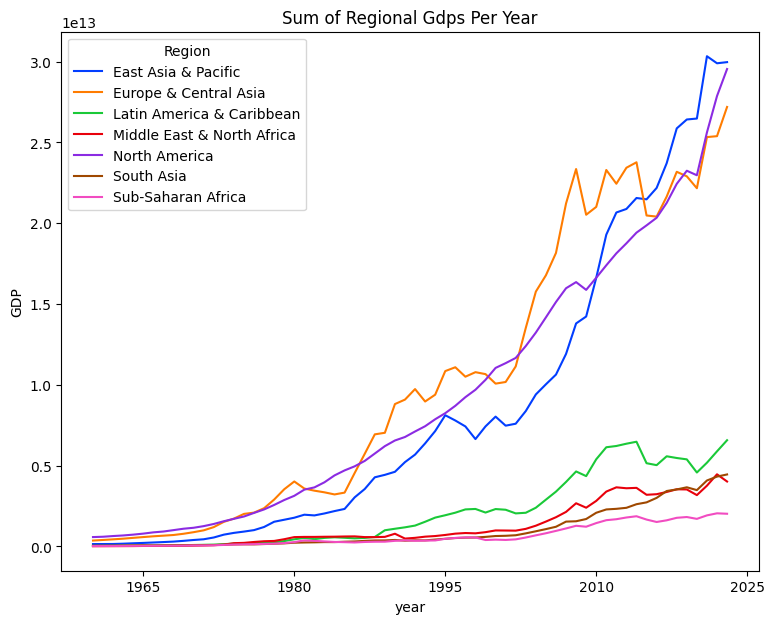

In [8]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize = (9,7))
sum_gdp_per_region = joined_code_income.groupby(['Region','year'])['GDP'].sum().reset_index()
sns.lineplot(data = sum_gdp_per_region, x = "year", y = "GDP", hue = "Region", palette = color_pal)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) #going to completely honest I used AI assistance to do this. It makes 5 ticks along the axis
plt.title("Sum of Regional Gdps Per Year")
plt.savefig("Sum of Regional Gdps Per Year", dpi=300, bbox_inches='tight')

It seems that there are three regions -East Asia & Pacific, Europe & Central Asia, and North America- that are very dominant. Lets remove them to see if there are other trends that we can identify around the other regions.

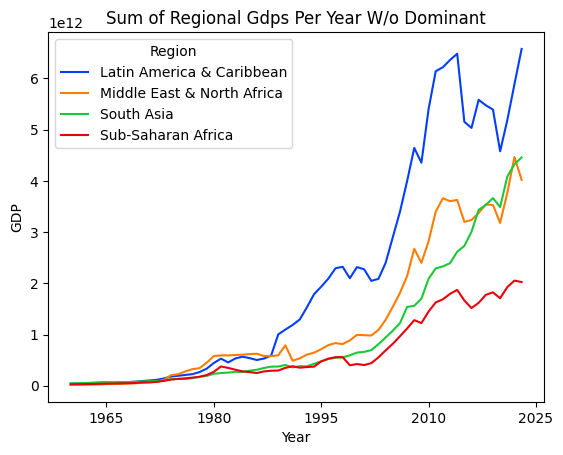

In [9]:
no_north_america = sum_gdp_per_region[~sum_gdp_per_region["Region"].isin(["North America","East Asia & Pacific", "Europe & Central Asia"])]
sns.lineplot(data = no_north_america, x = "year", y = "GDP", hue = "Region", palette = color_pal)
plt.title("Sum of Regional Gdps Per Year W/o Dominant")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) #going to completely honest I used AI assistance to do this 
plt.savefig("Sum of Regional Gdps Per Year", dpi=300, bbox_inches='tight')

This doesn't look like anything special, but it's pretty clear that Sub-Saharan Africa is pretty low even without the three powerhouses. 

Lets now take a lot at median Gdps by Region. We're picking median GDP's though to make sure that were attempting to balance for outliers.


Text(0.5, 1.0, 'Median GDP by Region')

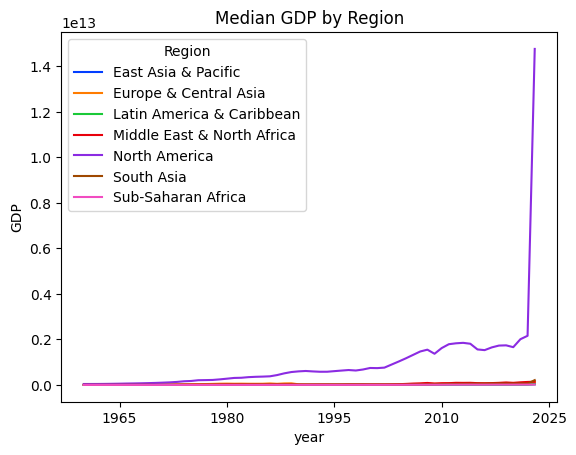

In [10]:
median_gdp_per_region = joined_code_income.groupby(['Region','year'])['GDP'].median().reset_index()

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) #going to completely honest I used AI assistance to do this
sns.lineplot(data = median_gdp_per_region, x = "year", y = "GDP", hue = "Region", palette=  color_pal)
plt.title("Median GDP by Region")

Something really strange is happening around 2020, lets take a look I have a suspicsion though that one of the three "north american" countries drops out so the median is either canada or the US.

In [11]:
na = joined_code_income[joined_code_income["Region"] == 'North America']
na = na[na["year"] == 2023]
na
#We were right! Bermuda doesn't have an entry in 2023. 

,Country Name,Country Code,year,GDP,Region,IncomeGroup
1599,Bermuda,BMU,2023,NaN,North America,High income
2495,Canada,CAN,2023,2.140000e+12,North America,High income
16255,United States,USA,2023,2.740000e+13,North America,High income


Lets do that graph from above except this time lets cut the year at 2023 so this graph doesn't blow up at 2023.


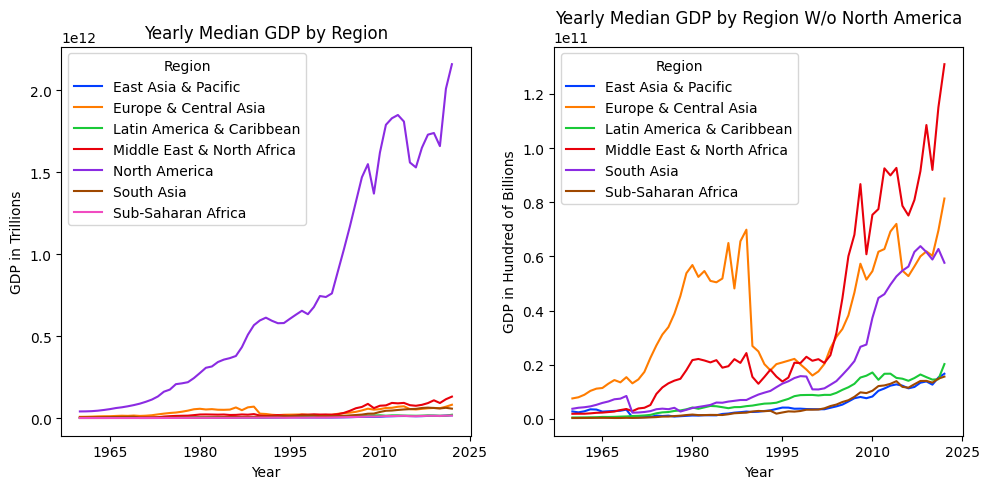

In [12]:
no_2023 = median_gdp_per_region[median_gdp_per_region["year"] != 2023]
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) #going to completely honest I used AI assistance to do this
sns.lineplot(data = no_2023, x = "year", y = "GDP", hue = "Region", palette=  color_pal) #ok fuck off north america we dont need this
plt.title("Yearly Median GDP by Region"); plt.xlabel("Year"); plt.ylabel("GDP in Trillions")

plt.subplot(1,2,2)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) #going to completely honest I used AI assistance to do this
no_na_median = no_2023[no_2023["Region"] != "North America"]
sns.lineplot(data = no_na_median, x = "year", y = "GDP", hue = "Region", palette=  color_pal)
plt.title("Yearly Median GDP by Region W/o North America"); plt.xlabel("Year"); plt.ylabel("GDP in Hundred of Billions")
plt.tight_layout()

Im not an expert in global policy or anything, but I dont think many people would have predicted the second most median GDP for regions around the world would be held by the Middle East and North Africa. While oil is huge I was not under the impression that it was something that was something so sheerly dominant. Also what's happening in South Asia in 2023??That drastic increase in the final year is crazy, my assumption is that it's like NA from earlier where one country's data hasn't been collected yet. But going back to North Africa & middle east, this may have something to do with the number of countries in North Africa where they maybe aren't as many as one would expect, with the middle one being fairly well off while other regions like EAPAC (East Asia and Pacific), include many small island nations.

## Adding The Second/Third Data Set

Now lets join in the Gender Inequality Index provided by the UN. The GII attempts to measure gender Inequality by a number of factors, with the ones im going to be focusing in on being adolescent birth rate, female labor force%, maternal mortality rates, % of women with secondary education, and % of women in parliament. There will be a cell below dictating what each indicator actually is. The goal is see how well GDP can relate with Gender Inequality, eventually doing the predictions/inference section using GDP to predict factors of the GII. But lets read this in, format it, and check the data types of what were working with. Finally you will see me adding a third data set, as listed in our "data" cell it's being used solely to create a gdp per capita column.

In [13]:
gii = pd.read_csv("Data/Gender Inequality Index.csv")

gii.tail()

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
52929,ZZO.OECD,Organization for Economic Co-operation and Dev...,GII,Gender Inequality Index,NaN,lfpr_m,"Labour force participation rate, male (% ages ...",2022,68.7,NaN
52930,ZZO.OECD,Organization for Economic Co-operation and Dev...,GII,Gender Inequality Index,NaN,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2020,21.0,NaN
52931,ZZO.OECD,Organization for Economic Co-operation and Dev...,GII,Gender Inequality Index,NaN,pr_f,"Share of seats in parliament, female (% held b...",2022,32.7,NaN
52932,ZZO.OECD,Organization for Economic Co-operation and Dev...,GII,Gender Inequality Index,NaN,se_f,Population with at least some secondary educat...,2022,86.7,NaN
52933,ZZO.OECD,Organization for Economic Co-operation and Dev...,GII,Gender Inequality Index,NaN,se_m,Population with at least some secondary educat...,2022,89.3,NaN


It looks like these countries that don't have an isocode of 3 aren't real countries so lets filter this to only have countries with length three. It also looks like the  "indexCode", "index","dimension", "indicatorCode" and "note" columns don'y have anything useful in there so lets drop those columns. Then lets check to make sure that the data types are what they should be intended to be/natural. 

In [14]:
gii = pd.read_csv("Data/Gender Inequality Index.csv")
gii = gii.drop(columns = ["indexCode", "index","dimension", "indicatorCode", "note"])
gii = gii[gii["countryIsoCode"].apply(len) == 3]
#gii.head()
gii.tail()

,countryIsoCode,country,indicator,year,value
49859,ZWE,Zimbabwe,Population with at least some secondary educat...,2018,71.707
49860,ZWE,Zimbabwe,Population with at least some secondary educat...,2019,72.643
49861,ZWE,Zimbabwe,Population with at least some secondary educat...,2020,73.591
49862,ZWE,Zimbabwe,Population with at least some secondary educat...,2021,73.591
49863,ZWE,Zimbabwe,Population with at least some secondary educat...,2022,73.591


In [15]:
for val in gii.columns:
    data_type = type(gii[val].iloc[0])
    print(f"The data type of column {val} is {data_type}")

The data type of column countryIsoCode is <class 'str'>
The data type of column country is <class 'str'>
The data type of column indicator is <class 'str'>
The data type of column year is <class 'numpy.int64'>
The data type of column value is <class 'numpy.float64'>


As the types are just fine, we should try to format the data frames so that we have values for different indicators in different columns by eachh year and country. I will say as a hindsight note I'm sure I did this the inefficient monkey way but that's ok because the final result ended up as what we wanted :'). For reference the "All_score_gdp" is the scores merged with GDP by year, while all_scores represents the values seen in the GII index. Were also going to put what each Indicator Description actually is

In [16]:
indicators = np.unique(gii['indicator'])
for indicator in indicators:
    print(f"Indicator Desciptions: {indicator} ")

Indicator Desciptions: Adolescent Birth Rate (births per 1,000 women ages 15-19) 
Indicator Desciptions: GII Rank 
Indicator Desciptions: Gender Inequality Index (value) 
Indicator Desciptions: Labour force participation rate, female (% ages 15 and older) 
Indicator Desciptions: Labour force participation rate, male (% ages 15 and older) 
Indicator Desciptions: Maternal Mortality Ratio (deaths per 100,000 live births) 
Indicator Desciptions: Population with at least some secondary education, female (% ages 25 and older) 
Indicator Desciptions: Population with at least some secondary education, male (% ages 25 and older) 
Indicator Desciptions: Share of seats in parliament, female (% held by women) 
Indicator Desciptions: Share of seats in parliament, male (% held by men) 


In [17]:
gii

,countryIsoCode,country,indicator,year,value
0,AFG,Afghanistan,"Adolescent Birth Rate (births per 1,000 women ...",1990,142.960
1,AFG,Afghanistan,"Adolescent Birth Rate (births per 1,000 women ...",1991,147.525
2,AFG,Afghanistan,"Adolescent Birth Rate (births per 1,000 women ...",1992,147.521
3,AFG,Afghanistan,"Adolescent Birth Rate (births per 1,000 women ...",1993,147.896
4,AFG,Afghanistan,"Adolescent Birth Rate (births per 1,000 women ...",1994,155.669
...,...,...,...,...,...
49859,ZWE,Zimbabwe,Population with at least some secondary educat...,2018,71.707
49860,ZWE,Zimbabwe,Population with at least some secondary educat...,2019,72.643
49861,ZWE,Zimbabwe,Population with at least some secondary educat...,2020,73.591
49862,ZWE,Zimbabwe,Population with at least some secondary educat...,2021,73.591


In [18]:
adol_gii = gii[gii['indicator'] == indicators[0]]
lfpf = gii[gii['indicator'] == indicators[3]]
maternal = gii[gii['indicator'] == indicators[5]]
second_f = gii[gii['indicator'] == indicators[6]]
parla = gii[gii['indicator'] == indicators[8]]

In [19]:
gdp_long_sorted = gdp_long_sorted.rename(columns = {"Country Code": "countryIsoCode"})
adol_gii = adol_gii.rename(columns = {"value": "adol_value"})
lfpf = lfpf.rename(columns = {"value": "lf female%"})
maternal = maternal.rename(columns = {"value": "maternal mortality"})
second_f = second_f.rename(columns = {"value": "second education female"})
parla = parla.rename(columns = {"value": "female parliament%"})

all_score = adol_gii.merge(lfpf, how = 'left', on = ["countryIsoCode", "year"]).merge(maternal, how = 'left', on = ["countryIsoCode", "year"])
all_score = all_score[["countryIsoCode", "year", "adol_value", "lf female%", "maternal mortality"]].merge(second_f, how = 'left', on = ["countryIsoCode", "year"]).merge(parla, how = 'left', on = ["countryIsoCode", "year"])
all_score = all_score[["countryIsoCode", "year", "adol_value", "lf female%", "maternal mortality", "second education female", "female parliament%"]]

all_score_gdp = all_score.merge(gdp_long_sorted, how = 'left', on = ["countryIsoCode", "year"])
all_score_gdp = all_score_gdp[["countryIsoCode", "year", "adol_value", "lf female%", "maternal mortality", "second education female", "female parliament%", "GDP"]]
all_score_gdp

,countryIsoCode,year,adol_value,lf female%,maternal mortality,second education female,female parliament%,GDP
0,AFG,1990,142.960,NaN,1377.859,1.108,NaN,NaN
1,AFG,1991,147.525,NaN,1392.786,1.221,NaN,NaN
2,AFG,1992,147.521,NaN,1451.594,1.335,NaN,NaN
3,AFG,1993,147.896,NaN,1368.816,1.449,NaN,NaN
4,AFG,1994,155.669,NaN,1375.091,1.562,NaN,NaN
...,...,...,...,...,...,...,...,...
6430,ZWE,2018,98.507,64.60,358.504,60.982,34.286,3.415607e+10
6431,ZWE,2019,97.354,60.69,393.176,62.197,34.571,2.183223e+10
6432,ZWE,2020,96.180,60.35,356.759,63.435,34.571,2.150970e+10
6433,ZWE,2021,94.312,60.01,356.759,63.435,34.571,2.837124e+10


With our GII values properly formated lets just quickly add a population column from a third dataset. To do this were pulling our population data from the UN. To join it properly we can join on the country code key, but first we're going to adjust data types to match and clean our column names so it won't be a pain in the ass to type it all everytime (cleaned with a regex). 

In [20]:
pop = pd.read_csv("data/population_world_un.csv",header=16)

countries = pop[pop["Type"] == "Country/Area"]
countries = countries[["ISO3 Alpha-code", "Year", "Total Population, as of 1 January (thousands)", "Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"]]
countries = countries.rename(columns = {"ISO3 Alpha-code": "countryIsoCode", "Year":"year"})
countries["year"] = countries["year"].astype('int')

for column in countries.columns[2:]:
    countries[column] = countries[column].str.replace(" ", "")
    countries[column] = countries[column].astype(int) * 1000

countries.columns = countries.columns.str.lower().str.replace(r',.*$', "", regex = True)

all_score_gdp.columns = all_score_gdp.columns.str.lower()

all_score_gdp_pop = all_score_gdp.merge(countries, how = 'left', on = ["countryisocode", "year"])
all_score_gdp_pop["gdp_capita"] = all_score_gdp_pop["gdp"]/all_score_gdp_pop["total population"] 

## Plotting Second Data set

Now that everything is formatted properly lets go on to the fun part and do some graphing! Lets start with some boxplots to get a general sense of distributions before we move on to a heatmap of the correlation coefficients, with a pairplot to finish things off! 

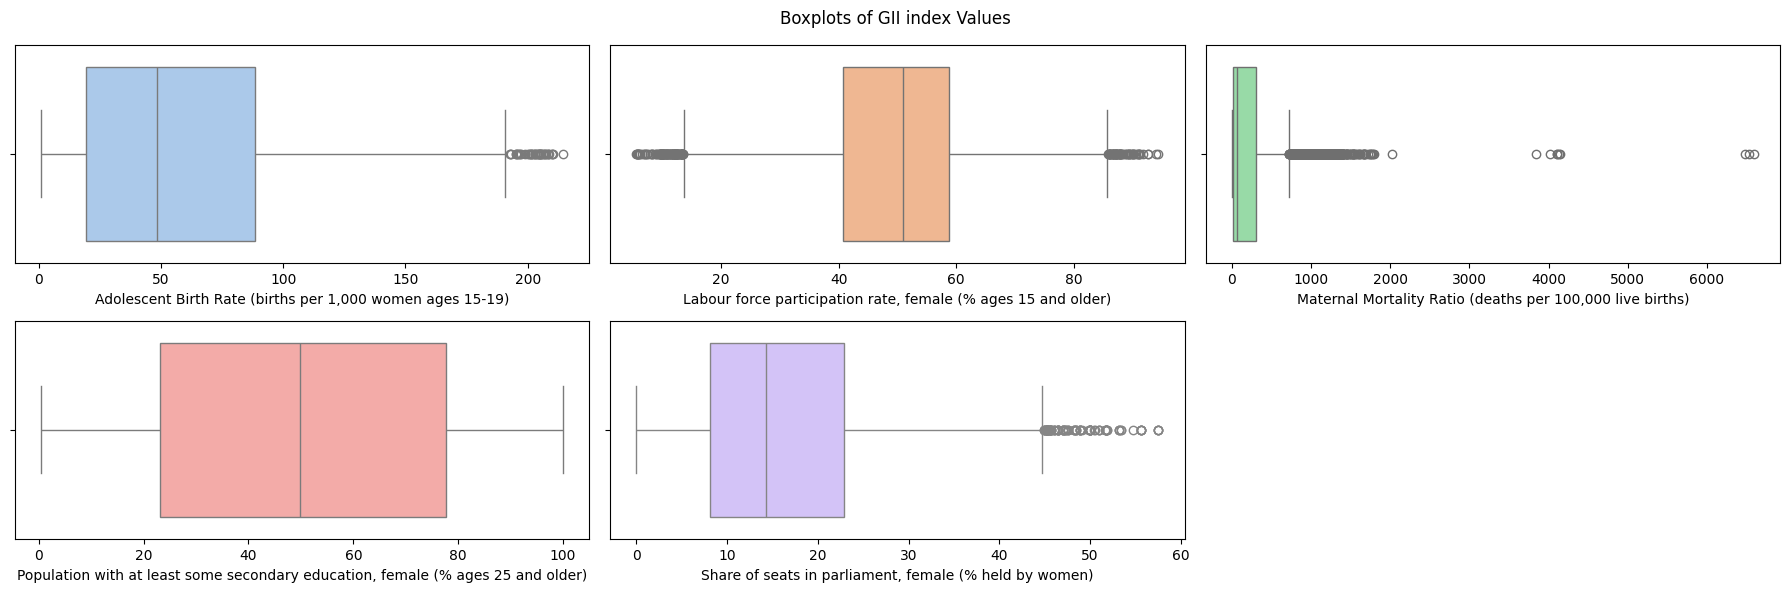

In [21]:
frames = [adol_gii, lfpf, maternal, second_f, parla]
plt.figure(figsize= (18,6))

for i in range(len(frames)):
    value = frames[i].columns[-1]
    plt.subplot(2,3,i+1)
    sns.boxplot(data = frames[i], x = value, color = sns.color_palette('pastel')[i])
    plt.xlabel(f"{frames[i].indicator.iloc[0]}")

plt.suptitle("Boxplots of GII index Values")
plt.tight_layout()

### Boxplot Descriptions:

While looking at the distributions, all of these are roughly as we expect. I find it very satisying the boxplot for population with some secondary education is a box with min at 0, max at 100 and it's centered at 50. It looks like something my highschool stats teacher would use to teach us what a boxplot was. I think the ugliest one is the one for the maternal mortality ratio, as it's all scrunched up with some very extreme outliers in little clusters above 6000 and 4000. (We'll see later that these boxplots show these outliers much betters than the histogram). I find it odd though that the % of seats in parliament held by women only has a median of 15ish%. That seems very low in my head, especially because I thought there was a larger relationship between population with at least some secondary education and parliament %. Lets now move on to a 
heat map of the correlation coefficients to see these relationships a little bit better.

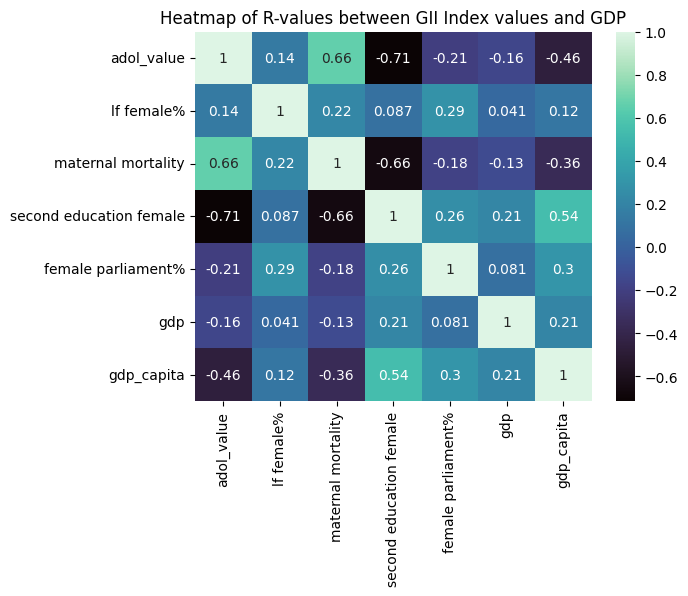

In [22]:
#for calculating the corr coef between all these values
capita_vals = all_score_gdp_pop[all_score_gdp_pop.columns[2:]].drop(columns = ["total population", "male population", "female population"]) #I wish I thought of this earlier
capita_corr = capita_vals.corr()

sns.heatmap(data = capita_corr, annot = True, cmap = 'mako')
plt.title("Heatmap of R-values between GII Index values and GDP")
plt.savefig("GII Heatmap", dpi=300, bbox_inches='tight')

### Description of Heatmap
Before we describe the correlations lets clarify all statistics and values used to compute this correlation coefficient matrix. Adol_value corresponds to the adolescent birthrate, meaning the higher the value the more children born per 1000 women. lf female% corresponds to the percentage of women in the labor force (greater than 15 years old). Maternal mortality corresponds to deaths per 100,000 live births. Second education is relatively self-explanatory with it being the population of women with at least some secondary education. Female parliament percentage is also self-explanatory, same with GDP. As a note, when I say "raw GDP" I'm referring to pure GDP as in not per-capita.


Now lets describe what we're seeing taking note of all the noteworthy correlations. The strongest (absolute value) correlations of notes are the relationships between the amount of women with a secondary education with women who die in childbirth and the adolescent birthrate. Both of these relationships are signifcantly negative, which does match observed trends around the world. With more women being able to pursue careers this is a frequent story in countries like Japan and the Northern European countries. Naturally if women are having children less, the maternal mortality (deaths per 100,000 live births) is also going to drop sheerly by the fact there aren't as many births. I find it interesting though that the correlation between the percentage of women with a seconddary education with adolescent birthrate is more correlated than the relationship between maternal mrtality and adolescent birth rates. I assumed that countries with higher adolescent birthrates would have a significantly higher maternal mortality rate as adolescent births are significantly more dangerous. One thing I noticed that's strange is a positive correlation between the % of women in the labor force and the maternal mortality rate. I wonder why there's an association between women working and an increased death rate. (In hindsight my rational is that women who are stressed with work are at more risk of death during birth). One last thing that I find very interesting but not suprising is how gdp per capita just is universally a stronger effect than raw gdp. We can see in our heatmap how the correlation coefficients in this model literally is just magnified and basically tripled between gdp and gdp per capita.

Now lets talk a <B>lack</B> of correlations that I assumed when coming into this project. For starters I really thought that there would be a stronger positive correlation between female parliament% and the raw GDP (shown as 0.037). In my head I rationalized this by thinking those parliament members would promote higher education of woman, which in turn would only lead to a more educated workforce which has been shown to lead to an increase in the raw GDP. Similarly I also rationalized that a higher percentage of women in the labor force would also lead to an increase in raw GDP because more women would imply more people in the work force. I say this because typically women are seen as home-makers in many countries, so a higher percentage of women in the labor force to me would imply that there would be an increase in raw GDP. I could do some work to bring in a population dataset to do this with raw GDP per capita and I very well might, but depending on when I get back to this I may be on too tight of a deadline to do that.

Now Lets take a look at the pairplot of these values

Pairplot of GII values across all years


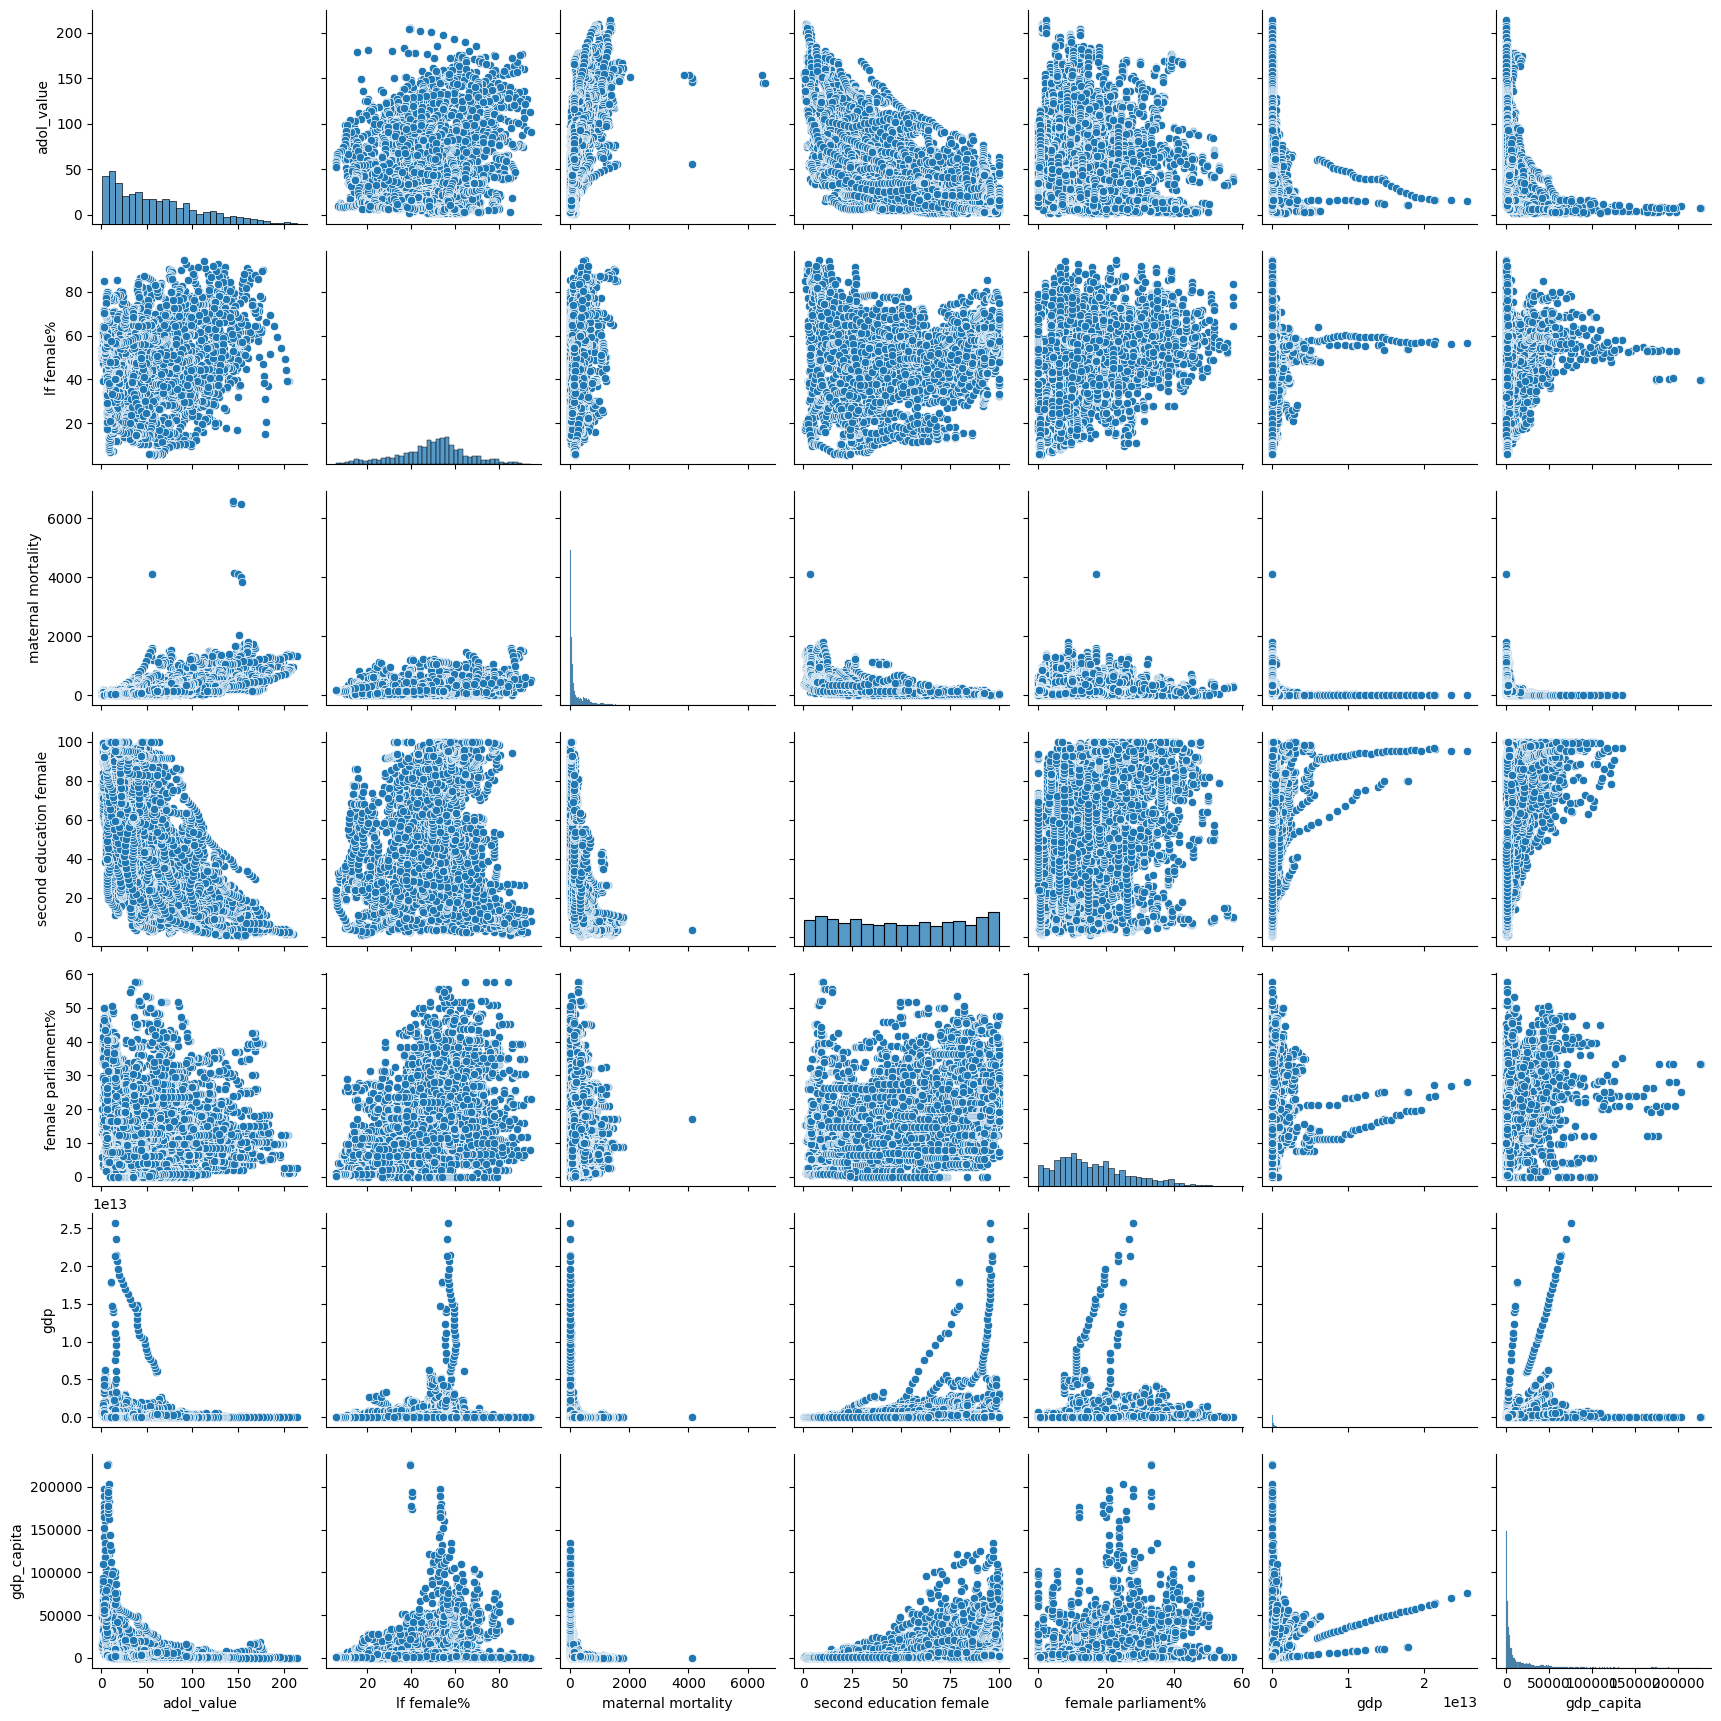

In [24]:
print("Pairplot of GII values across all years")
sns.pairplot(data = capita_vals)


### Pairplot Insights
A recurring theme in the pairplot that we can in any graph with gdp there is a column/bar of points. My suspicion is that these series of points are points relating to the united states. One problem with this pairplot is how we have so many data points considerings this is from roughly 200 countries, with each year having a list of values. So while this is interesting, lets takea  look at a pairplot for the year 2020 only because then it's recent and we'll have less points to let us identify trends a little easier

Pairplot for GII values in 2020


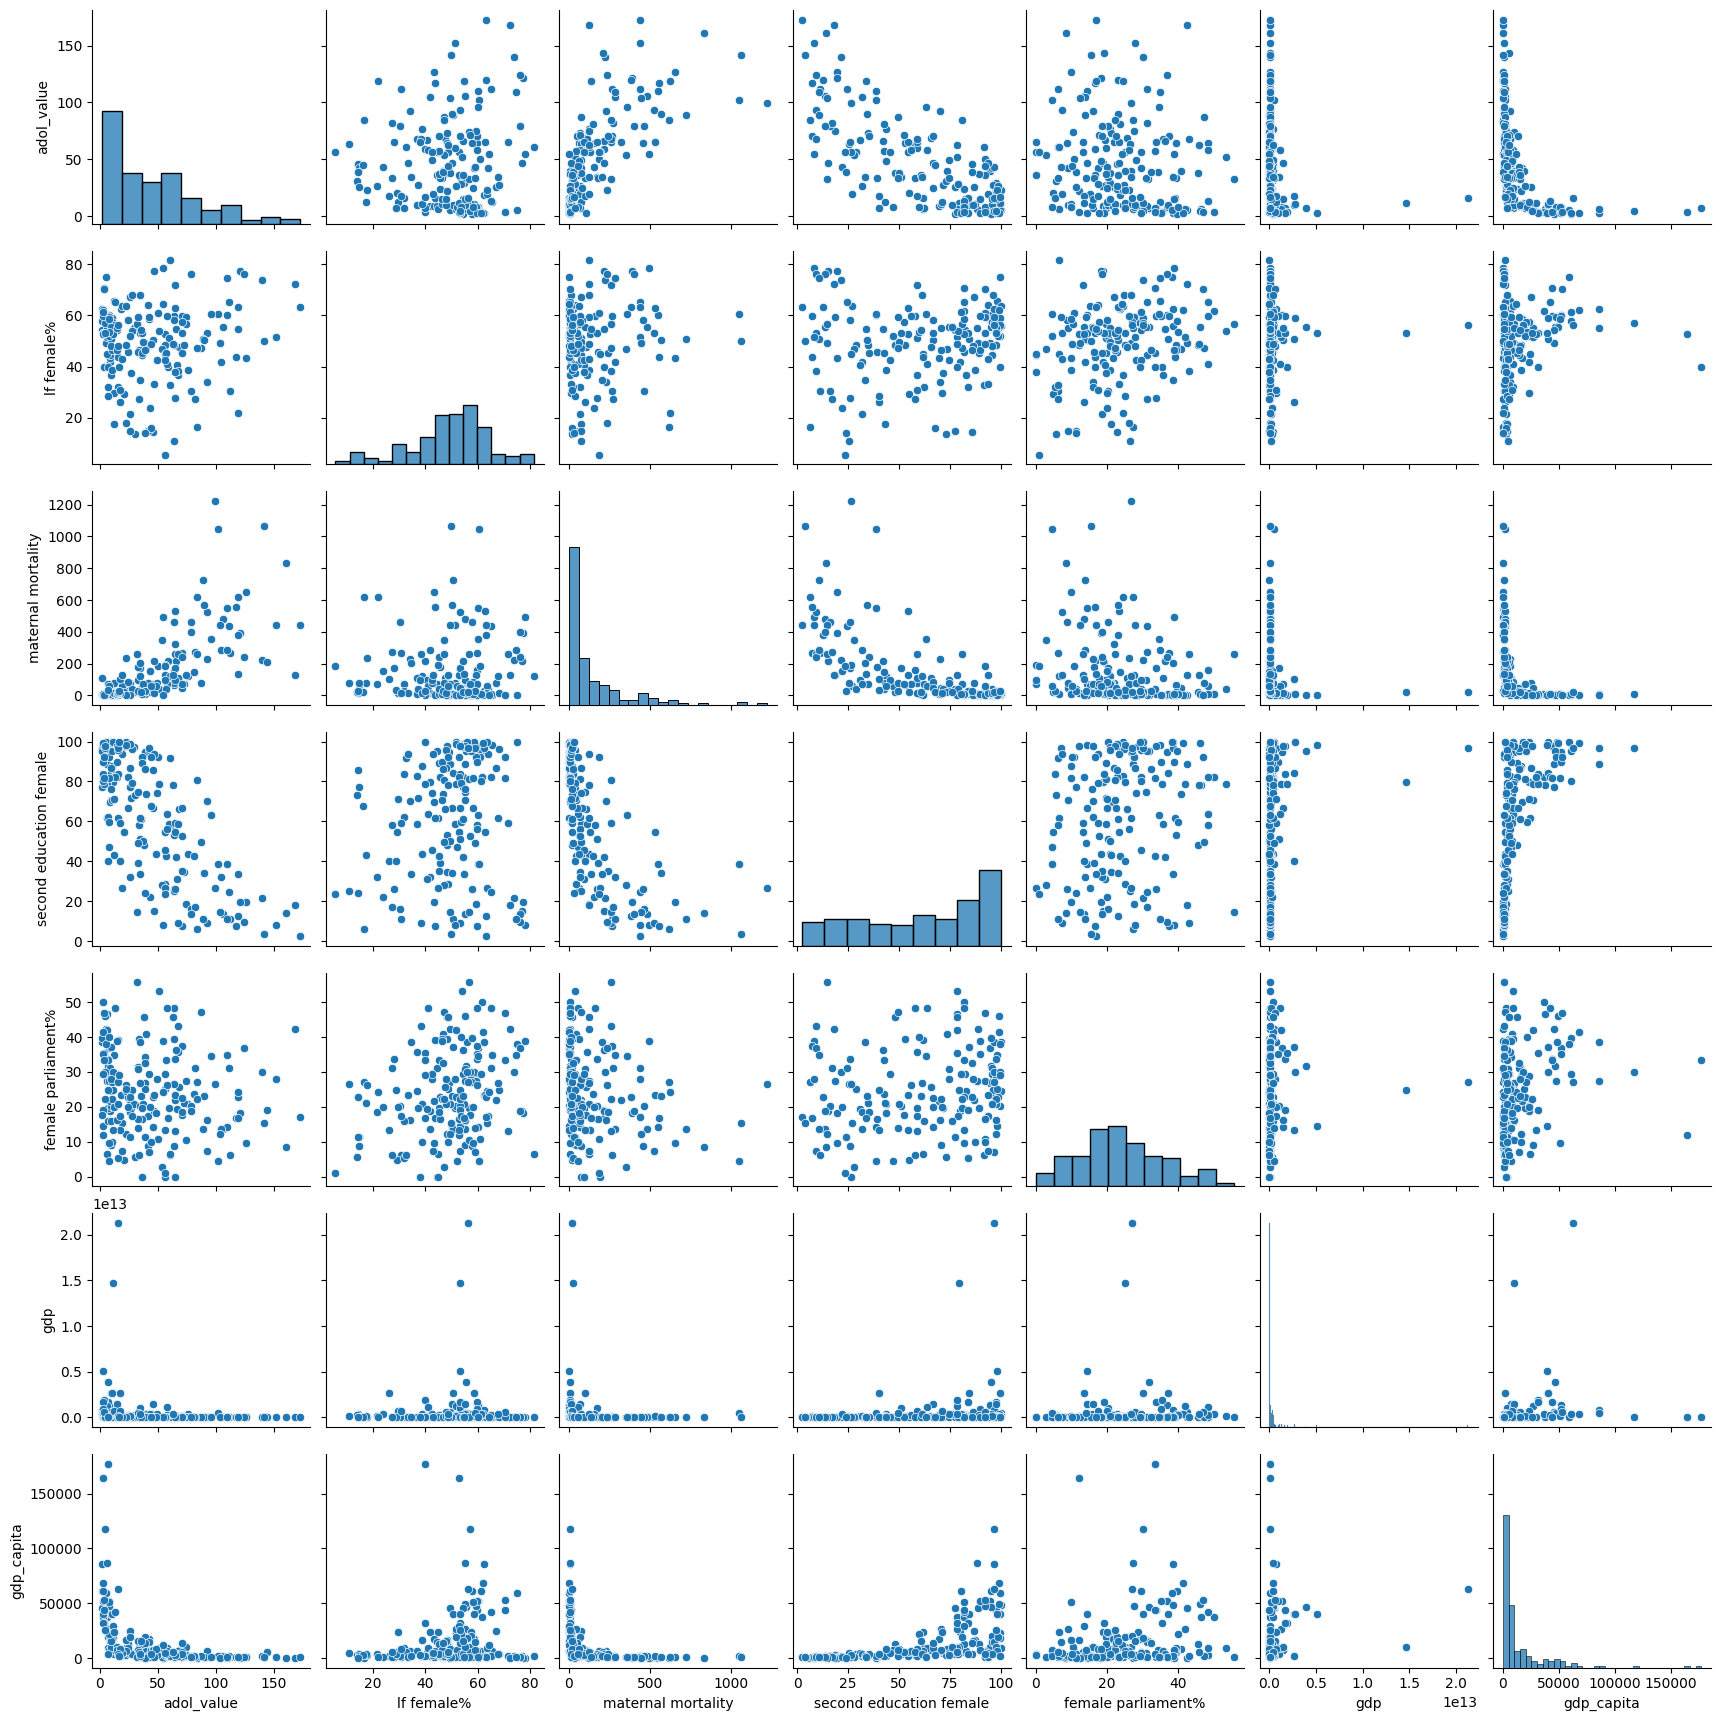

In [25]:
recent = all_score_gdp_pop[all_score_gdp_pop["year"] == 2020]
recent = recent[["adol_value", "lf female%", "maternal mortality", "second education female", "female parliament%", "gdp",'gdp_capita']]
print("Pairplot for GII values in 2020")
sns.pairplot(data = recent)
plt.savefig("Seaborn Pairplot", dpi=300, bbox_inches='tight')

In [26]:
(200/((1.08)**3))/(1.08**7)

92.63869761693682

### Pairplot insights part 2: 

This looks a lot better now that it's not overwhelmed with as many points. Now we can see trends that are a little bit more defined instaed of having just a massive cloud of points for everything. One of the clearest negative associatiosn we can see among the scatterplots to see is the negative correlation between adol_value (adolscent birth rates) and % of women with a second education. One of the interesting scatterplots to me is the relationship between female parliament % and female second education %. In this scatterplot we can see that there really isn't any correlation between women in parliament and second education. This was contradicting my intitial guess, thinking that if more women were in parliament there would be more women in the general pursuing/having the ability to pursue a higher education. Finally I'm now going to examine the histogram of maternal mortality rates in greater detail below because it's clearly right skewed and the boxplot for it up above was really weird.

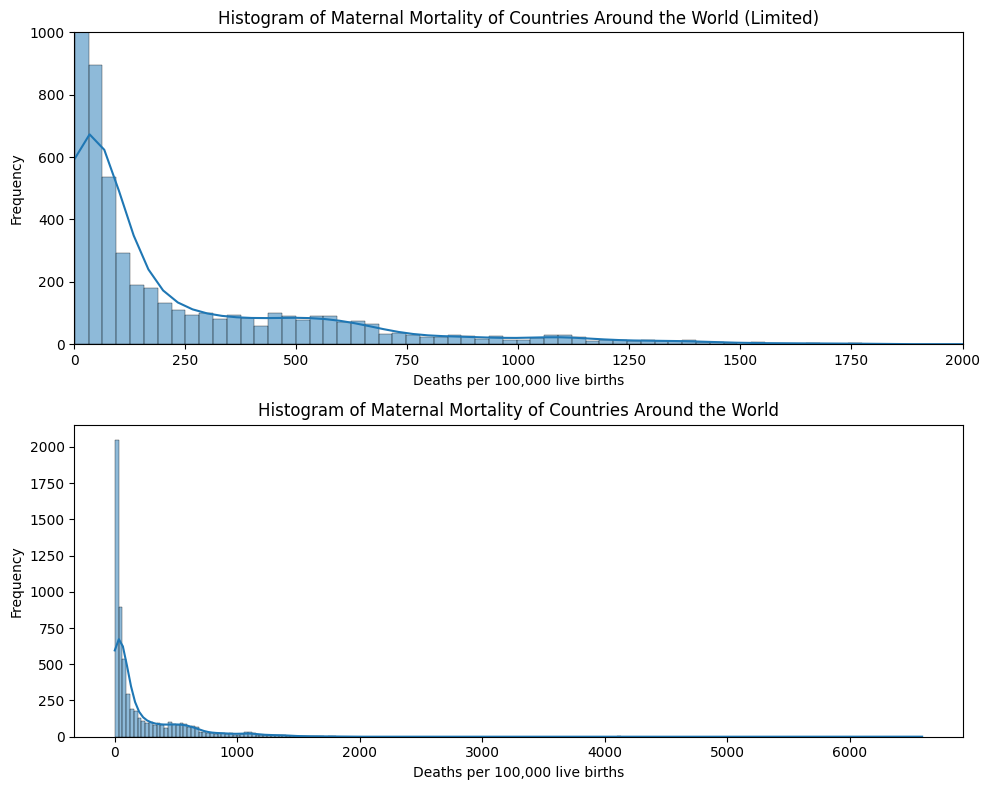

In [27]:
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
sns.histplot(data = all_score, x = "maternal mortality", kde= True)
plt.ylim(0,1000); plt.xlim(0,2000); plt.title("Histogram of Maternal Mortality of Countries Around the World (Limited)"); plt.xlabel("Deaths per 100,000 live births")
plt.ylabel("Frequency")
plt.subplot(2,1,2)
sns.histplot(data = all_score, x = "maternal mortality", kde = True)
plt.title("Histogram of Maternal Mortality of Countries Around the World"); plt.xlabel("Deaths per 100,000 live births");plt.ylabel("Frequency")
plt.tight_layout()

<B>Analysis:</B>
Of the two histograms above the one labeled as "limited" is bounded at a y-max of 1000 and an x-max of 2000. I bounded this graph because then it's a little bit visually clearer to see the distinctions of the right skew. It's important to note that the reason it's defaulting to move past 6000, is because there is a section of outliers (seen in our boxplot above) that is pulling the bound farther out. This right skew implies that most countries have found ways to provide safe births/have the resources to provide safe births, however a very significant minority are not as fortunate. 

## EDA Conclusion

I left EDA impressions along the way but I think there are some very key points that we should take note of before moving on to the inference section. For one, the most important thing I think for future sections is the relationship between how gdp vs gdp per capita affects GII coefficient values. In this case we noted that the strength of linear coefficients basically tripled when looking at gdp vs gdp per capita where gdp per capita was much better at serving at predicting. Another good insight to see that we learned in our pairplot of 2020 is how multiple relationships weren't actually linear, they were instead logrithimic or exponential (ex: gdp per capita and female second education rates). The most visually linear relationship in these pairplots was between female secondary education rates and adolescent birth rates, with it being our strongest correlation in our heatmap at .7. Moving into the inference section lets examine more closely one particular question.

# Inference Section

So for this inference section heres my question: Does gdp affect GII values uniformly across regions? This question came to me when discussing my project with my friends and I was suprised by the differences in responses to what we expected gdp to do across regions. We unaniousmly agreed that higher gdp meant better statistics but a couple said that it was going to be roughly the same effect across regions while some of us (including me) thought that it was going to be significantly different. So this leads me here so lets see if we can answer this question!

### Gaining Intuition about our Variables

Before we go too off into the weeds of trying to answer our question lets gain a little bit of intuition about our variables that we're going to be making predictions about. To do this we need to do a couple of table joins and then were simply going to look at two lineplots comparing the GII value to year, and year to GDP per capita. In doing so we can learn general insights for how things across years are improving for each respective variable


As we don't want countries that got added late to were only going to include countries that have a full GII value since 2005. So lets create a mask and then only use these countries

In [28]:
gii_value = gii[gii['indicator'] == 'Gender Inequality Index (value)']
gii_value.columns = gii_value.columns.str.lower()

testing = gii_value.groupby("countryisocode")["year"].min().reset_index()[np.array(gii_value.groupby("countryisocode")["year"].min() < 2005)]
since_2005 = testing.countryisocode

value_regional = gii_value[gii_value.countryisocode.isin(since_2005)].merge(code_region_income ,how = 'left', left_on = 'countryisocode', right_on = "Country Code")
value_regional = value_regional.drop(columns = ["Country Code", "IncomeGroup"])

value_regional_gdp = value_regional.merge(all_score_gdp_pop, how = 'left', on = ["countryisocode","year"])[["countryisocode", "year","Region", "value", "gdp", "gdp_capita"]]

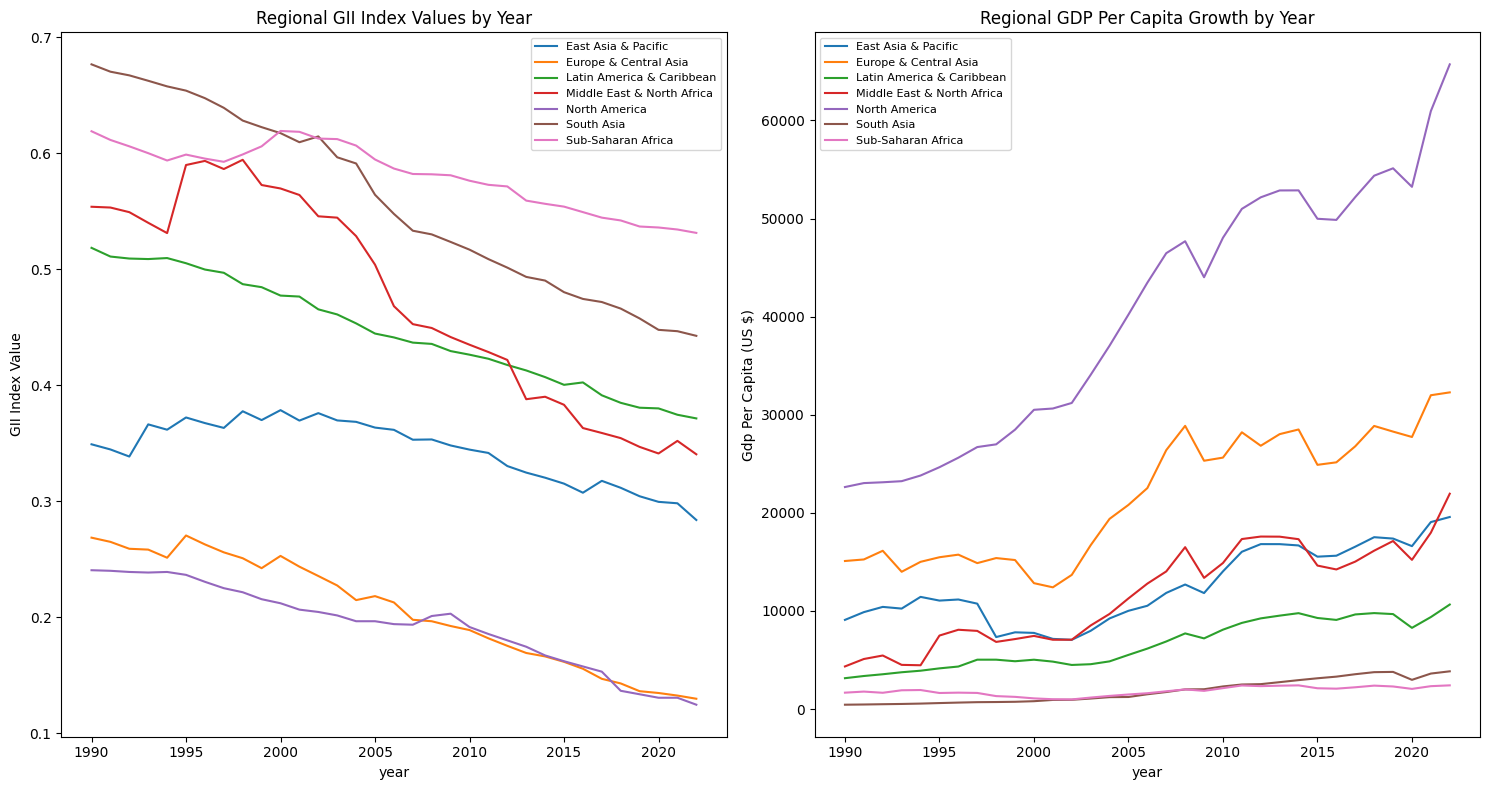

In [29]:
gdp_region_groups = value_regional_gdp.groupby(by = ["Region", "year"]).agg({'value':'mean', 'gdp':'mean', 'gdp_capita':'mean'}).reset_index()
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.lineplot(data = gdp_region_groups, x = "year", y = "value", hue = "Region")
plt.ylabel('GII Index Value'); plt.title("Regional GII Index Values by Year")
plt.legend(fontsize = 8)

plt.subplot(1,2,2)
sns.lineplot(data = gdp_region_groups, x = "year", y = "gdp_capita", hue = "Region")
plt.ylabel("Gdp Per Capita (US $)"); plt.title("Regional GDP Per Capita Growth by Year")
plt.legend(fontsize = 8)
plt.tight_layout()

Good to note that everything is as expected. GII index goes down across years, while GDP per Capita goes up by year. Thats a good sign to start lets do two more graphs, one being a scatterplot to see generally what are data looks like and the other being another regional lineplot graph that measures the mean GII index value against mean regional GDP per Capita. 

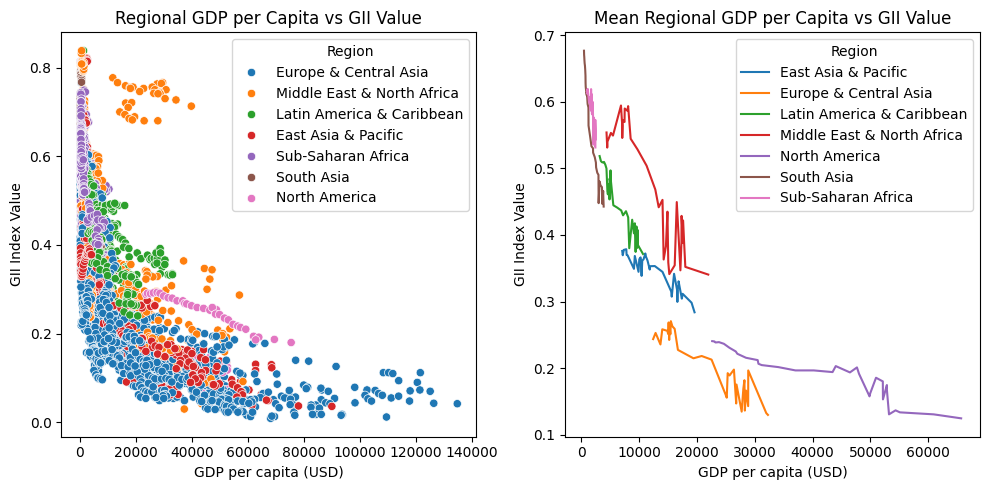

In [30]:
gdp_region_groups = value_regional_gdp.groupby(by = ["Region", "year"]).agg({'value':'mean', 'gdp':'mean', 'gdp_capita':'mean'}).reset_index()
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.scatterplot(data = value_regional_gdp, x = "gdp_capita", y = "value", hue = "Region")
plt.title("Regional GDP per Capita vs GII Value"); plt.xlabel("GDP per capita (USD)"); plt.ylabel("GII Index Value")

plt.subplot(1,2,2)
sns.lineplot(data = gdp_region_groups, x = 'gdp_capita', y = "value", hue = "Region")
plt.title("Mean Regional GDP per Capita vs GII Value"); plt.xlabel("GDP per capita (USD)"); plt.ylabel("GII Index Value")
plt.tight_layout()


Using a description that lacks ... sophistication, the graph on the right literally looks a child squiggled some crayons onto there and called it a day. What this can tell us the relationship between GDP per capita and GII Index Values is that we lack data to fully compare as we might wish as there regions without overlap in GDP per Capita. However, ignoring it for now and analyzing the graph on the left, we can see that theres some negative relationship there that looks like a negative exponential. It looks very reminscent of one the homeworks we did where we looked at bike use across a casual and non-casual population. In that case we used something like lowess (locally weighted scatterplot smoothing), in this case I think we're also going to use lowess, that way we can see and compare if the models have similar slopes across the graph despite us just having tons of data points floating around. This will be a good benchmark before we more rigoursly examine this relationship by comparing slopes of simple linear regression. To prepare for simple linear regression lets take the log of our data to transform it into something more linearly related, as what we have right now is something that looks like a negative exponetential.  


### Lowess

(Text(0.5, 0, 'GDP Per Capita (USD)'), Text(0, 0.5, 'GII Index Value'))

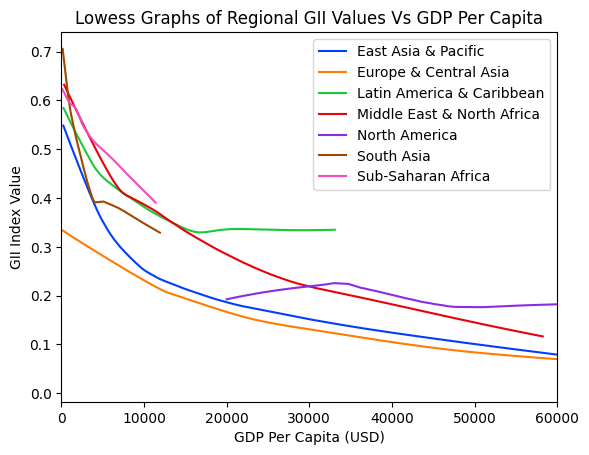

In [31]:
from statsmodels.nonparametric.smoothers_lowess import lowess

regions = np.unique(gdp_region_groups.Region)
i = 0 #for incrementing the colors on the graph
for region in regions:
    x_obs = value_regional_gdp[value_regional_gdp["Region"] == region].gdp_capita
    y_obs =  value_regional_gdp[value_regional_gdp["Region"] == region].value
    y_smooth = lowess(y_obs, x_obs, return_sorted = False)
    sns.lineplot(x = x_obs, y = y_smooth, label = f"{region}", color = color_pal[i], alpha = 1)
    i += 1
plt.xlim(0,60000)
plt.title("Lowess Graphs of Regional GII Values Vs GDP Per Capita");plt.xlabel("GDP Per Capita (USD)"), plt.ylabel("GII Index Value")

Hmm, well this graph definitely helps form some opinion on our original question. What's the most interesting point here is assuming GDP per Capita was directly effecting it, we should see more regional overlap via intsersections of regional curves. This overlap would imply that when a region reaches a certain gdp per capita there would be a threshold that we expect the GII value to be. What this graph is implying is that despite similar GDP per Capita, different regions have different GII value despite similar slopes. To me this implies a greater overarching theme in GII values pointing towards different regions having different "intercepts" or baselines for gender inequality. For example it seems that while the Middle East and North Africa have similar slopes to East Asia and Pacific and Europe Central Asia, they are all at different GII values on the graph indicating the difference in intercepts. My suspicon is that these "intercepts" that we're finding are the things that are foundational to similar countries in a region, Examples being culture, religion and history and much more. While countries definitely all have different cultures from eachother, the regional differences in lifestyles that are developed are much more similar to countries in their own region than those not in their own region.



### Simple Linear Regression
 Now that we have this baseline for intercepts lets take a look at slopes of each of these regional plots and compare them from eachother. To do this let's first make the relationship mainly linear by taking the logrithim of our GDP transforming it to something more linear. Then were going to examine these slopes by using scikit and their simple linear regression model extracting both slopes and intercepts. Before we fully do that though we're going to need to fully remove null values from our data set as Scikit doesn't have any default handling for them inside of the package. 

Text(0, 0.5, 'GII Index Value')

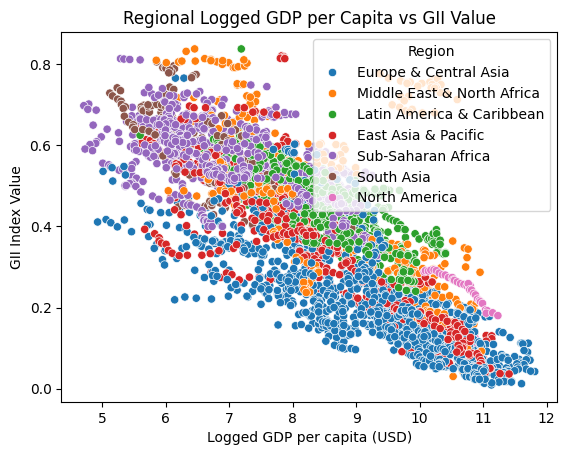

In [32]:
#log transformed data
value_regional_gdp["logged"] = np.log(value_regional_gdp["gdp_capita"])
sns.scatterplot(data = value_regional_gdp, x = "logged", y = "value", hue = "Region")
plt.title("Regional Logged GDP per Capita vs GII Value"); plt.xlabel("Logged GDP per capita (USD)"); plt.ylabel("GII Index Value")

In [33]:
#removing nulls

In [34]:
value_regional_gdp = value_regional_gdp[~(value_regional_gdp['gdp_capita'].isna())] #removing null values, found earlier there were only 20 null entries

In [35]:
#helpful imports
def invert_color_seaborn(rgb):
    return tuple(1 - c for c in rgb) 
#Used AI to make this but it'll be important for the next part
from sklearn.linear_model import LinearRegression
model = LinearRegression()

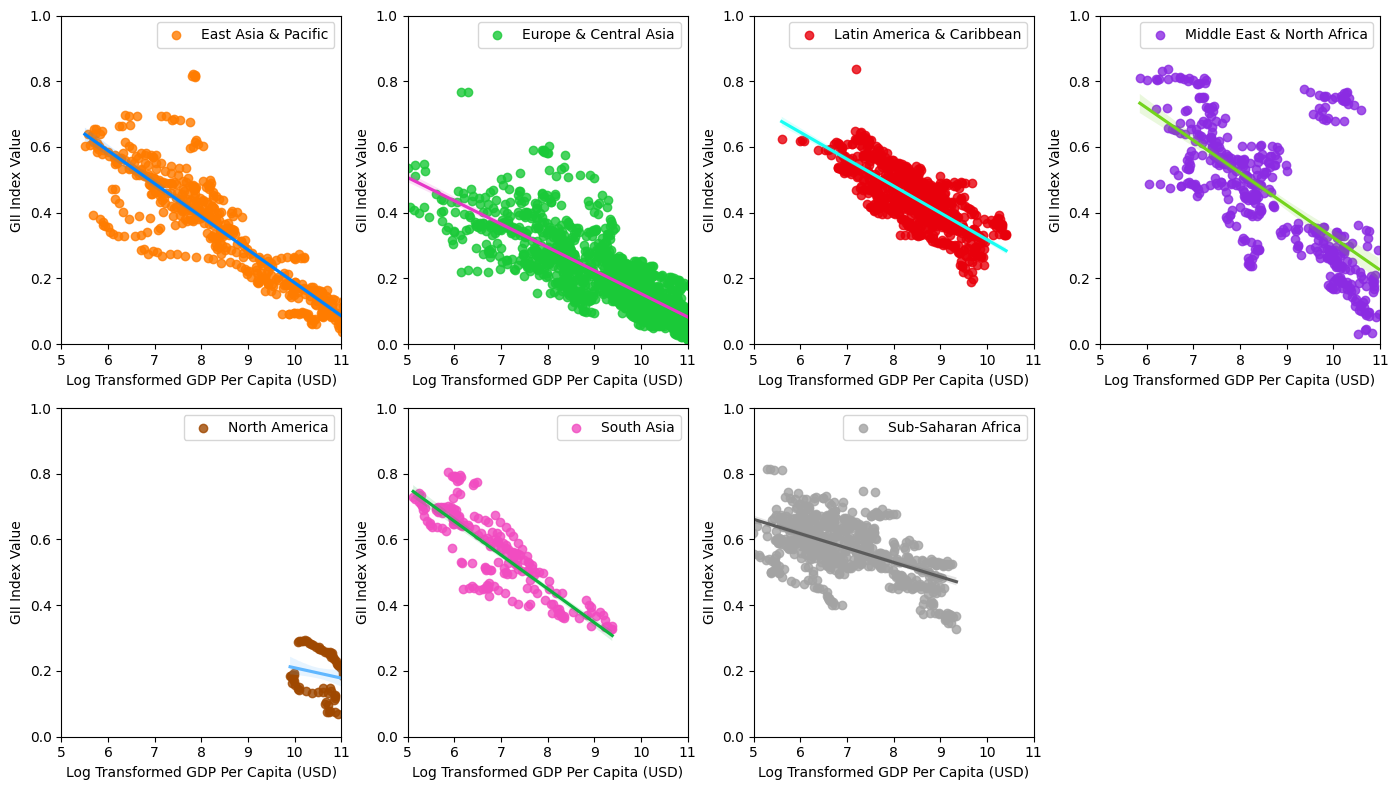

In [36]:
#This cell may be needed later Andy
regions = np.unique(gdp_region_groups.Region)
i = 1
slopes = np.array([])
inters = np.array([])

plt.figure(figsize = (14,8))
for region in regions:
    regional_data = value_regional_gdp[value_regional_gdp.Region == region]
    plt.subplot(2,4,i)
    sns.regplot(data = regional_data, x = 'logged', y = "value", color = color_pal[i], label = region, line_kws ={'color': invert_color_seaborn(sns.color_palette('bright')[i])})
    plt.xlim(5,11);plt.ylim(0,1) #Standardizes the Axis across the different plots
    plt.legend(loc = 'upper right')
    plt.xlabel("Log Transformed GDP Per Capita (USD)")
    plt.ylabel("GII Index Value")
    i += 1

    model.fit(X = regional_data[["logged"]], y= regional_data['value'])
    slope = model.coef_
    slopes= np.append(slopes, slope[0])
    
    inter = model.intercept_
    inters = np.append(inters,inter)

plt.tight_layout()

In [37]:
for i in range(len(regions)):
    print(f"Region: {regions[i]} | Slope: {slopes[i]*100} | Intercept: {inters[i]}\n")


Region: East Asia & Pacific | Slope: -10.052112554723642 | Intercept: 1.1922664796693867

Region: Europe & Central Asia | Slope: -7.06825868878976 | Intercept: 0.8607358321230931

Region: Latin America & Caribbean | Slope: -8.166812819764795 | Intercept: 1.1345213353760215

Region: Middle East & North Africa | Slope: -9.856218377711016 | Intercept: 1.310092577790639

Region: North America | Slope: -3.1327375874892627 | Intercept: 0.5229894555666083

Region: South Asia | Slope: -10.273945935451195 | Intercept: 1.272244845607784

Region: Sub-Saharan Africa | Slope: -4.367712032622438 | Intercept: 0.879591823938047



## The Answer

After examining the slopes it appears as if GDP per Capita does not have a uniform effect on every region's GII index values. While there are similar effects between certain regional groups, it seems like we can create three categories of regions: High slopes, medium slopes, and low slopes (See chart below for where regions fall). After standardizing these axis' such that all 7 regions are on the same scale, it's kind of clear that these regional differences are visually observable via the slopes. What's also interseting is what categories these countries fall in and how it points to our original claim discovered in lowess that geographical connections between regions relate how the slopes will be between region. If you were to create a map geographically shading each region by slope steepness, you would find that the regions similar are geographically or foundationally historically related. What I mean by this is that the "high-slopes" category are literally all geographically bordering eachother, while the medium slopes are Europe/central Asia and Latin America & Carribean, a region that was historically colonized mainly by spain. I'm assuming through that process distinct spainard cultural values were engraved into these countries and a result they are similar to European values. Our outliers of Sub-Saharan Africa and North-America, are interesting because they point to a money problem. In the case of North America, they're simply too rich to compare on the same scale as we just don't have the data from when North America wasn't. In the case of Sub-Saharan Africa we have constantly seen across earlier graphs (refer to above), they are always the lowest in GDP in all metrics whether it be per Capita, mean, sum or others. Taking this and our LOWESS plot into account I think we are prepared to answer our original question: Does gdp affect GII values uniformly across regions? 

Answer- GDP per capita does not seem to affect every region uniformly, however there regional groupings that we can create where GDP per capita affects regions in these grouping similarly. These grouping that we can create all share greater foundational ties, whether it be geographical or foundational ties. In the case of historical ties we compared how Latin America & Carribean as a region it was mainly colonized by Spain a country that shared similar cultural values and lifestyles to other European countries. These roughly similar values and lifestyles in regions seem to be driving the impact of logged GDP per Capita on GII Index values. These values and lifestyles could be seen in our intercept values of our regression plots and the shape of our Lowess plot, where we gathered that these values and lifestyles created "intercepts" or baselines for different regions' Gender inequality scores. 

<U>Regional Categories</U>
- High-Slopes: East Asia & Pacific, Middle East & North Africa, South Asia. 
- Medium: Europe & Central Asia, Latin America & Caribbean, 
- Low: Sub-Saharan Africa, North America. 

### Sources of Error

**DISCLAIMER!** Something to take note of is that we simply lack the data for regions for the entire range of GDP values. This puts flaws in our analysis, for example: North America only has recorded values of logged gdp per capita between 10 and 11, and it's reasonable if not expected that the slope at 10-11 will be different than a slope from 5-6. As we're not comparing across the same range of x-values it's likely that we're introducing error by treating them as the same. However because the UN just wasn't tracking GII values and the components that create them until relatively recently, we cannot fully compare as we might wish. Another source of error that may exist by nature of how we conducted our table joining is how these values that are being compared are from different years as they are just GDP and GII values. Something that definitely will influence these factors would be historical values, I.e it wouldn't be necessarily fair to comapre a country in the middle of political instability to countries that are relatively stable. There are other factors that could very well influence these values, however as we're just looking at GDP per capita and GII values we don't have the full story for whats happening inside of a country. 

# Prediction Section

### The Plan

For this prediction section, lets see if we can try to predict the percentage of women who have a secondary education using features from our dataframe that has other GII index values, gdp values, and population statistics. To do this were going to do multi-linear regression, splitting our data with k-fold cross validation. To ensure that we have data while also avoiding problems from too large of a year sample, lets first cut-off our data to only be years since 2015. By doing this I hope to reduce the amount of bias that comes from comparing data collected across a large gap of years. From there our plan is to create multiple models by changing which features we're going to be using to predict values and analyze train/test error using RMSE just as we did in our labs. Finally we will then attempt to use the model that has the least amount of test error. 


So lets start this by first subsetting our data into years past 2015 and then splitting it into multiple train/test sets through k-fold cross validation. 

In [38]:
past_2015 = all_score_gdp_pop[all_score_gdp_pop["year"] >= 2015]
past_2015.head(5)

,countryisocode,year,adol_value,lf female%,maternal mortality,second education female,female parliament%,gdp,total population,male population,female population,gdp_capita
25,AFG,2015,97.415,24.24,775.693,4.575,27.445,1.913422e+10,33436000,17100000,16732000,572.264076
26,AFG,2016,94.018,22.71,749.816,4.879,27.445,1.811657e+10,34227000,17541000,17159000,529.306466
27,AFG,2017,90.342,21.17,681.808,5.182,27.445,1.875346e+10,35174000,18039000,17650000,533.162464
28,AFG,2018,88.431,19.61,663.428,5.486,27.445,1.805322e+10,36204000,18565000,18178000,498.652709
29,AFG,2019,86.803,18.06,644.273,5.789,27.244,1.879944e+10,37282000,19120000,18736000,504.249892


### Necessary Due Diligence

Really quickly there are two things to adress before doing anything, first we must shuffle our data because right now it's sorted by country and year and second we need to remove null values as we will be using scikit(and as seen earlier it does not like them). Lets then start doing some k-fold validation importing functions from our labs on this topic to make my life easier. For these imports because in hindsight these are a lot, I basically went to lab7 and imported everything necessary from there. So for the following cell my source on these functions? All lab 7

When doing K-fold validation we dont explicitly need to manually split the data into train and test sets, so I wont do it. The model we will be using will be ridge/l2 regularization, which means that we will need to standardize our data for this model to actually do anything. With these steps in mind lets start implementing them. This cell below imports all helpful functions from lab7.

In [39]:
#imports, model intialization and helpful functions
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def rmse(actual_y, predicted_y):
    return np.sqrt(np.mean((actual_y-predicted_y)**2)) #pulled straight from lab 7

def compute_CV_error(model, X_train, Y_train): #pulled straight from lab 7 again
    kf = KFold(n_splits=6)
    validation_errors = np.empty(0)
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx,:], X_train.iloc[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the model on the training spli
        model.fit(split_X_train, split_Y_train)

        # Predict housing prices on the test set
        y_pred = model.predict(split_X_valid)
        
        # Compute the RMSE on the validation split
        R_mse = rmse(split_Y_valid, y_pred)

        validation_errors = np.append(validation_errors, R_mse)
        
    return np.mean(validation_errors)

### Intuition Part 2

To get a feel for how much each feature will be related, we can re-examine our heatmap from earlier looking at correlation coefficients between these. I fear that if we introduce every feature into our model I will just be overfitting this model to the core. So for now lets test different models and different features, starting with adol_value. maternal mortality rates and gdp_capita to predict this as they have the strongest correlation to secondary education. 

<Axes: >

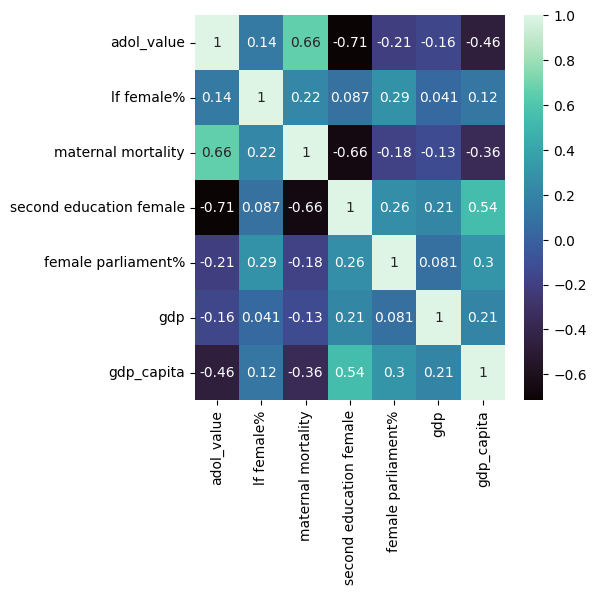

In [40]:
plt.figure(figsize = (5,5))
sns.heatmap(data = capita_corr, annot = True, cmap = 'mako')

### Actual Model Building

With that general feel for variables lets start building our model. We need to remember though to handle all null values so that when we use a scikit model nothing breaks immediately. The code looks sort of weird but the idea is that given features it will automatically handle and update our past_2015 to remove rows that have null values even if rows in other features have nulls in them. This way we're not just dropping a bomb on our data and just removing everything that has a null in it. For one additional thing, we can also adjust the "features" variable such that we predict and train different models on whatever features we adjust to to see which is the most effective.

In [41]:
features = np.array(["adol_value", "maternal mortality", "gdp_capita"]) #change this line to test different features
null_handled = past_2015
for feature in features:
    mask = null_handled[feature].isna()
    null_handled = null_handled[~mask]
    
null_handled = null_handled[~null_handled["second education female"].isna()] #we're predicting this so we always need this null handled
null_handled.head(1)

,countryisocode,year,adol_value,lf female%,maternal mortality,second education female,female parliament%,gdp,total population,male population,female population,gdp_capita
25,AFG,2015,97.415,24.24,775.693,4.575,27.445,1.913422e+10,33436000,17100000,16732000,572.264076


With null values handled and out of the way lets start actually constructing our model. This is going to look very similar to our lab 7 where we used l2 regularization. So lets start by standardizing our data and shuffling our data. Once we complete that lets attempt to find the value of alpha that will be best for this model. To do this I'm going to literally do exactly as lab7 had us do and create a range of alphas to test, then computing the CV error with each model trained with each alpha. We'll then pick the best alpha from our dataframe and use it to actually make our model.

In [42]:
ss = StandardScaler()

range_of_alphas = 10**np.linspace(-5, 4, 40)
error_df = pd.DataFrame(columns = ["alpha", "CV Error"])

#Standardizing and shuffling data
shuffled = null_handled.sample(frac = 1, random_state = 5)#by setting this equal to 5 we can reproduce this case
shuffled_num = shuffled.drop(columns = ["countryisocode", 'year']) #dropping for standard scaler
ss.fit(shuffled_num)
shuffled_standard = pd.DataFrame(ss.transform(shuffled_num), columns = shuffled_num.columns)

X = shuffled_standard[features]
Y = np.array(shuffled_standard["second education female"])

#Were using cross validation so we don't need to split into train/test sets manually
for alpha in range_of_alphas:
    regularized_model = Ridge(alpha = alpha)
    cv_error = compute_CV_error(regularized_model, X,Y)
    error_df.loc[len(error_df)] = [alpha, cv_error]

error_sorted = error_df.sort_values(by = "CV Error")
best_alpha = error_sorted["alpha"].iloc[0]
best_error = error_sorted["CV Error"].iloc[0]

In [43]:
X

,adol_value,maternal mortality,gdp_capita
0,-1.084453,-0.654185,0.705090
1,1.894200,0.462981,-0.655843
2,1.546803,0.683637,-0.669637
3,-0.899165,-0.657347,-0.417490
4,-0.881737,-0.595856,0.170334
...,...,...,...
1336,0.283261,1.763350,-0.700063
1337,-1.047647,-0.662228,0.719600
1338,-0.954806,-0.633969,0.226186
1339,0.059390,0.210749,-0.326652


Now that we have our best alpha value lets predict some values and compare them to their actual values on a scatterplot. Originally I was losing my mind as I was trying to plot this model on a 2d axis, not using my brainpower. For the record I understand why that just doesn't make sense to do (more than one feature as a predictor), at the time I must've been incredibly tired. When we do this lets plot both the standardized value of our data and our re-transformed data against eachother such that we can see both the raw model and then the more human version. To un-standardize our data we can just multiply by the std of our original set of secondary education and then add the mean to it to revert back to original units: $original = (standardized * \sigma) + \bar{x}$

Text(0, 0.5, 'Actual Female Secondary Education% Value')

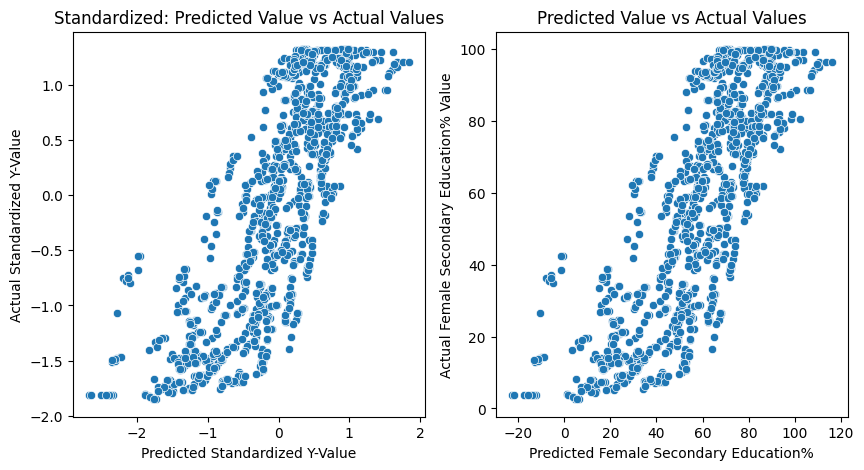

In [44]:
best_cv = Ridge(alpha = best_alpha)
best_cv.fit(X,Y)
y_pred = best_cv.predict(X)
y_original = shuffled["second education female"]

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x =  y_pred, y = Y)
plt.title("Standardized: Predicted Value vs Actual Values"); plt.xlabel("Predicted Standardized Y-Value"); plt.ylabel('Actual Standardized Y-Value')

#Predicted Value's in Original units
plt.subplot(1,2,2)
sns.scatterplot(x = y_pred*np.std(y_original) + np.mean(y_original) , y = Y*np.std(y_original) + np.mean(y_original))
plt.title("Predicted Value vs Actual Values"); plt.xlabel("Predicted Female Secondary Education%"); plt.ylabel('Actual Female Secondary Education% Value')

In [45]:
error_unit =  best_error * np.std(y_original)**1/2
error_unit

9.379907065206158

### Utility, Error Analysis, and Behind The Scenes

Hey thats actually pretty good! It looks like our model did a pretty reasonable job at predicting second education rates using these three predictors, gdp per capita, adolescent birth rate and maternal mortality. I would feel confident that we would be in the general range of guessing the secondary education% in women in a country given our model here. The goal here is that by knowing certain statistic values and the GDP can we make a reasonable guess for what it could be and to answer that questiom, yes. This model could be reasonably used when we would have no way of measuring for education rates in that country, but we did have GDP and other factors that made up GII values. We could also retrain/adjust this model to predict secondary education given with other features.What I mean is that we're not limited to maternal mortality and adolescent birthrates, we can use other factors like female labor force% and female parliament% (it just may not be as accurate).

One immediate flaw in our model is how we handled boundaries in our model. In reality it doesn't make sense for an education rate to be negative, nor does it make sense for that education rate to be over 100% but considering those were a few model outliers im happy with how this turned out. In the end through cross validation this model was calculated to be .609 when standardized, but when returning that to units we can work with that's an error of 9.34. In this case that means the average distance away our prediction is from actual values is roughly 9.34, which means that our predictions are on average off by roughly 9.34% (the percent corresponding to the original units being in percent). While that's not great, for data that isn't correlated extremely well I feel like this is pretty solid. 

For the behind the scenes that you guys aren't seeing I'm experimenting with using different features. Unanimously the worst model I could find was just one variable with it being women labor force percentage. That had an abosolutely stunning error of 17.8 and looked like it just had no correlation in our lovely plot above. And as you might guess the model with the best error rate would be the one that's only predictor was secondary education rates in women (what were trying to predict) being a perfect straight line! Jokes aside the model that was really confusing was what happened when I tried using every single feature which ... lowered our cv error? We discussed in class how adding features would by definition reduce training error, but generally would lead to overfitting causing an increase in test error. But when analyzing what we did in lab and understanding k-fold validation, the cv error is the test error so it just seems like something contradictory to what we discussed in class. I'm rationalizing it by saying were not actually using that many features, our max feature count is only six features and I guess that led to us not predicting noise? Another thing to think about is that maybe the covariance between these variables isn't that great, such that when were predicting actual useful things as opposed to overlap between two predictions or noise. 